In [4]:
!pip install beautifulsoup4
!pip install lxml
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import io
import lxml.html as lh
import bs4 as bs
from bs4 import BeautifulSoup

import urllib.request

!pip install wikipedia
import wikipedia as wp

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
#import geocoder # import geocoder

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
! pip install folium==0.5.0
import folium # plotting library

! pip install yellowbrick

print('Folium installed')
print('Libraries imported.')

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab



Libraries imported.


In [5]:
# load total population of each Toronto neighbourhood
pop_path = pd.read_csv('c:/toronto_totpop.csv')
df_pop = pd.DataFrame(pop_path)
df_pop.drop(['Neighborhood Id'], axis=1, inplace=True)



# load household income of each Toronto neighbourhood
income_path = pd.read_csv('c:/toronto_income.csv')
df_income = pd.DataFrame(income_path)
df_income.drop(['Neighborhood Id'], axis=1, inplace=True)

print("{}, {}".format( df_pop.shape[1], df_income.shape[1]))

2, 2


In [6]:
from functools import reduce
dfs = [df_pop, df_income]
df_census = reduce(lambda left,right: pd.merge(left,right,on='Neighborhood'), dfs)
df_census.rename(columns={'After-Tax Household Income': 'Household Income'}, inplace=True)
df_census.sort_values('Household Income',ascending=False)

,Neighborhood,Total Population,Household Income
40,Bridle Path-Sunnybrook-York Mills,9266,161448
14,Kingsway South,9271,106386
102,Lawrence Park South,15179,105043
104,Lawrence Park North,14607,103660
9,Princess-Rosethorn,11051,93391
...,...,...,...
72,Moss Park,20506,37295
84,South Parkdale,21849,32539
120,Oakridge,13845,32079
73,North St.James Town,18615,31304


In [7]:
List_url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
source = requests.get(List_url).text

soup = BeautifulSoup(source, 'lxml')
table=soup.find('table')

#dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
column_names = ['Postalcode','Borough','Neighborhood']
df = pd.DataFrame(columns = column_names)
df

,Postalcode,Borough,Neighborhood


In [8]:
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['Postal Code'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)


df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})
#print(table_contents)
df


,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto Business,Enclave of M4L
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [9]:
import pathlib
from pathlib import Path
from pathlib import *
import csv


df_data_3 = pd.read_csv('C:\Geospatial_Coordinates (1).csv')
df_data_3.head(25)

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [10]:
#DATA notes:
#Toronto postal codes, boroughs, neighbor hoods scraped from wikipedia:
#https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

#From wikipedia: "This is a list of postal codes in Canada where the first letter is M. 
#Postal codes beginning with M are located within the city of Toronto in the province of Ontario. 
#Only the first three characters are listed, corresponding to the Forward Sortation Area."

#There may be multiple postal codes per borough. 
#There may be multiple neighborhoods per borough.
#There may be multiple neighborhoods per postal code.


In [11]:
#add latitude and longitude columns
df_geo1 = df.join(df_data_3.set_index('Postal Code'), on='Postal Code')
df_geo1


,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto Business,Enclave of M4L,43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


In [9]:
#df_geo1.to_csv('C:\toronto_df_geo1.csv')

In [12]:
#df_geo = df_geo1.join(df_census.set_index('Neighborhood'), on='Neighborhood')
#df_geo.drop(['Borough'], axis=1, inplace=True)
#df_geo.head(103)
#print(df_geo)
df_geo = df_geo1
df_geo

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto Business,Enclave of M4L,43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


In [13]:
print('The dataframe has {} boroughs and {} Postalcode.'.format(
        len(df_geo['Borough'].unique()),
        df_geo.shape[0]
    )
)
df_geo.head(103)

The dataframe has 15 boroughs and 103 Postalcode.


,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto Business,Enclave of M4L,43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


In [14]:
# number of postal codes in each borough
df_geo.groupby('Borough').count()['Postal Code']

Borough
Central Toronto            9
Downtown Toronto          17
Downtown Toronto Stn A     1
East Toronto               4
East Toronto Business      1
East York                  4
East York/East Toronto     1
Etobicoke                 11
Etobicoke Northwest        1
Mississauga                1
North York                24
Queen's Park               1
Scarborough               17
West Toronto               6
York                       5
Name: Postal Code, dtype: int64

In [15]:
address = 'Toronto'
geolocator = Nominatim(user_agent="toronto_explorer")
locate = geolocator.geocode(address)
latitude = locate.latitude
longitude = locate.longitude
print('Toronto Coordinates: {}, {}.'.format(latitude, longitude))

Toronto Coordinates: 43.6534817, -79.3839347.


In [16]:
# create map of Toronto using latitude and longitude values -- popups show neighborhood and borough
map_toronto_hoods = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_geo['Latitude'], df_geo['Longitude'], df_geo['Borough'], df_geo['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto_hoods)  
    
map_toronto_hoods

In [17]:
CLIENT_ID = '2K1YDT1I5RY4NGNMVIBTRVKXIDCF0V2GWYPQR2UELKIN3AXH' # your Foursquare ID
CLIENT_SECRET = 'U2DZSOQSKVFVPUI4ZHR0J4WKKSULNA0PREYCTBCHSOMOTGRK' # your Foursquare Secret
ACCESS_TOKEN = 'CRL15FXAGJATNJ0V3ORUZR0RTBCPFRATXCFCHETATV40Z0M3' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 300
radius = 500
print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

#fs_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
fs_url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
#display url from foursquare
fs_url

Your credentials:
CLIENT_ID: 2K1YDT1I5RY4NGNMVIBTRVKXIDCF0V2GWYPQR2UELKIN3AXH
CLIENT_SECRET:U2DZSOQSKVFVPUI4ZHR0J4WKKSULNA0PREYCTBCHSOMOTGRK


'https://api.foursquare.com/v2/venues/explore?&client_id=2K1YDT1I5RY4NGNMVIBTRVKXIDCF0V2GWYPQR2UELKIN3AXH&client_secret=U2DZSOQSKVFVPUI4ZHR0J4WKKSULNA0PREYCTBCHSOMOTGRK&v=20180604&ll=43.6534817,-79.3839347&radius=500&limit=300'

In [18]:
#display all the data from foursquare (toronto)
fs_toronto = requests.get(fs_url).json()
#fs_toronto

In [19]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venues.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [20]:
# function get_nearby_venues(downtown_df['neighbourhood'], downtown_df['latitude'], downtown_df['longitude'])
def getNearbyVenues(postalcodes, neighborhoods, latitudes, longitudes, radius=500):
    LIMIT = 500 # limit of number of venues returned by Foursquare API
    radius = 500 # define radius
    venues_list=[]
    for PostalCode, neighborhood, lat, lng in zip(postalcodes, neighborhoods, latitudes, longitudes):
        print(PostalCode,neighborhood)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            PostalCode,
            neighborhood, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Postal Code','Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [21]:
#Get venues and postal codes for all neighborhoods in our dataset
toronto_venues = getNearbyVenues(postalcodes=df_geo['Postal Code'],
                                neighborhoods=df_geo['Neighborhood'], 
                                latitudes=df_geo['Latitude'],
                                longitudes=df_geo['Longitude'])

M3A Parkwoods
M4A Victoria Village
M5A Regent Park, Harbourfront
M6A Lawrence Manor, Lawrence Heights
M7A Ontario Provincial Government
M9A Islington Avenue
M1B Malvern, Rouge
M3B Don Mills North
M4B Parkview Hill, Woodbine Gardens
M5B Garden District, Ryerson
M6B Glencairn
M9B West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
M1C Rouge Hill, Port Union, Highland Creek
M3C Don Mills South
M4C Woodbine Heights
M5C St. James Town
M6C Humewood-Cedarvale
M9C Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
M1E Guildwood, Morningside, West Hill
M4E The Beaches
M5E Berczy Park
M6E Caledonia-Fairbanks
M1G Woburn
M4G Leaside
M5G Central Bay Street
M6G Christie
M1H Cedarbrae
M2H Hillcrest Village
M3H Bathurst Manor, Wilson Heights, Downsview North
M4H Thorncliffe Park
M5H Richmond, Adelaide, King
M6H Dufferin, Dovercourt Village
M1J Scarborough Village
M2J Fairview, Henry Farm, Oriole
M3J Northwood Park, York University
M4J The Danforth  East
M5J Harbourfront E

In [20]:
toronto_venues.to_csv('C:/Users\hok3y/Documents/toronto_venues.csv') 


#df_geo1.to_csv('C:\toronto_df_geo1.csv')C:\Users\hok3y\Documents\toronto_income.csv

In [21]:
toronto_venues.shape

(2119, 8)

In [22]:
toronto_venues.head()

,Postal Code,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M3A,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,M3A,Parkwoods,43.753259,-79.329656,KFC,43.754387,-79.333021,Fast Food Restaurant
2,M3A,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
3,M4A,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,M4A,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop


In [23]:
toronto_venues.groupby('Postal Code').count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Postal Code,,,,,,,
M1B,1,1,1,1,1,1,1
M1C,1,1,1,1,1,1,1
M1E,9,9,9,9,9,9,9
M1G,4,4,4,4,4,4,4
M1H,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...
M9N,1,1,1,1,1,1,1
M9P,9,9,9,9,9,9,9
M9R,3,3,3,3,3,3,3


In [24]:
print('There are {} unique postal codes.'.format(len(toronto_venues['Postal Code'].unique())))

There are 100 unique postal codes.


In [25]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 276 uniques categories.


In [26]:
print("The Venue Categories are", toronto_venues['Venue Category'].unique())

The Venue Categories are ['Park' 'Fast Food Restaurant' 'Food & Drink Shop' 'Hockey Arena'
 'Coffee Shop' 'Portuguese Restaurant' 'Intersection'
 'Financial or Legal Service' 'Bakery' 'Distribution Center' 'Restaurant'
 'Spa' 'Breakfast Spot' 'Gym / Fitness Center' 'Historic Site'
 'Farmers Market' 'Chocolate Shop' 'Pub' 'Dessert Shop'
 'Performing Arts Venue' 'Yoga Studio' 'Mexican Restaurant' 'Café'
 'Theater' 'Asian Restaurant' 'French Restaurant' 'Event Space'
 'Shoe Store' 'Art Gallery' 'Cosmetics Shop' 'Electronics Store' 'Bank'
 'Beer Store' 'Wine Shop' 'Antique Shop' 'Boutique'
 'Furniture / Home Store' 'Vietnamese Restaurant' 'Clothing Store'
 'Accessories Store' 'Gift Shop' 'Miscellaneous Shop' 'Italian Restaurant'
 'Creperie' 'Beer Bar' 'Sushi Restaurant' 'Persian Restaurant' 'Diner'
 'Burrito Place' 'Salad Place' 'Fried Chicken Joint' 'Japanese Restaurant'
 'Burger Joint' 'Smoothie Shop' 'Sandwich Place' 'Gym' 'Bar'
 'College Auditorium' 'College Cafeteria' 'Music Venue'
 '

In [22]:
#

In [23]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head(100)

,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
toronto_onehot.shape

(2119, 272)

In [25]:
#Next, let's group rows by neighborhood and by taking the 
#mean of the frequency of occurrence of each category

toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.035714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Willowdale West,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
95,"Willowdale, Newtonbrook",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
96,Woburn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
97,Woodbine Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.000000


In [26]:
toronto_grouped.shape

(99, 272)

In [27]:
#Let's print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0                     Lounge   0.2
1               Skating Rink   0.2
2  Latin American Restaurant   0.2
3             Clothing Store   0.2
4             Breakfast Spot   0.2


----Alderwood, Long Branch----
          venue  freq
0   Pizza Place  0.25
1      Pharmacy  0.12
2           Gym  0.12
3  Dance Studio  0.12
4   Coffee Shop  0.12


----Bathurst Manor, Wilson Heights, Downsview North----
           venue  freq
0           Bank  0.09
1    Coffee Shop  0.09
2       Pharmacy  0.05
3  Deli / Bodega  0.05
4           Park  0.05


----Bayview Village----
                 venue  freq
0                 Café  0.25
1  Japanese Restaurant  0.25
2                 Bank  0.25
3   Chinese Restaurant  0.25
4                Motel  0.00


----Bedford Park, Lawrence Manor East----
                venue  freq
0  Italian Restaurant  0.07
1         Coffee Shop  0.07
2          Restaurant  0.07
3      Sandwich Place  0.07
4             Butcher  0.04

In [29]:
#put it into a pandas dataframe

In [31]:
#write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [32]:
#create the new dataframe and display the top 10 venues for each neighborhood.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Skating Rink,Lounge,Clothing Store,Breakfast Spot,Latin American Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Department Store
1,"Alderwood, Long Branch",Pizza Place,Coffee Shop,Pharmacy,Pub,Sandwich Place,Dance Studio,Gym,Donut Shop,Drugstore,Doner Restaurant
2,"Bathurst Manor, Wilson Heights, Downsview North",Bank,Coffee Shop,Mobile Phone Shop,Shopping Mall,Sandwich Place,Bridal Shop,Restaurant,Pizza Place,Pharmacy,Park
3,Bayview Village,Café,Japanese Restaurant,Bank,Chinese Restaurant,Women's Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run
4,"Bedford Park, Lawrence Manor East",Restaurant,Coffee Shop,Italian Restaurant,Sandwich Place,Women's Store,Indian Restaurant,Spa,Boutique,Liquor Store,Pub


In [33]:
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

import seaborn as sns

print('done')

done


In [36]:
# Cluster neighborhoods

In [58]:
#Run k-means to cluster the neighborhood into 5 clusters.
# set number of clusters
knclusters = 6

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=knclusters, init='k-means++', max_iter=15, random_state=0).fit(toronto_grouped_clustering)

X = toronto_grouped_clustering

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 2, 2, 4, 4, 4, 4, 4, 4, 1])

In [59]:
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.035714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Willowdale West,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
95,"Willowdale, Newtonbrook",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
96,Woburn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
97,Woodbine Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.000000


In [60]:
def get_inertia(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=15, random_state=8)
    km.fit(X)
    return km.inertia_

In [61]:
scores = [get_inertia(x) for x in range(2, 21)]

Text(0, 0.5, 'Error')

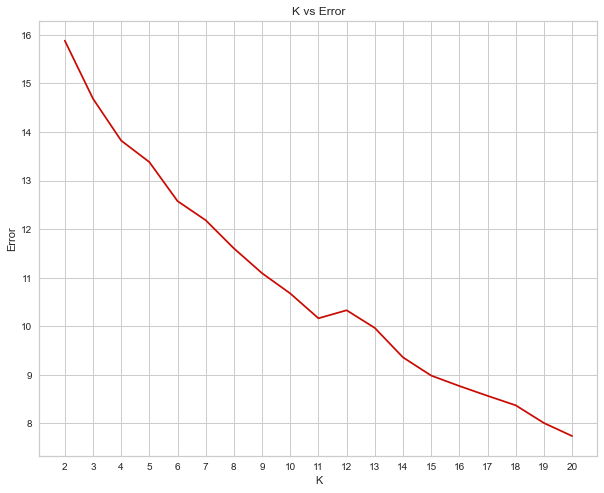

In [62]:
plt.figure(figsize=[10, 8])
sns.lineplot(x=range(2, 21), y=scores, color='r')
plt.title("K vs Error")
plt.xticks(range(2, 21))
plt.xlabel("K")
plt.ylabel("Error")

In [45]:
# k = 6
#create a new dataframe 
#that includes the cluster as well as the top 10 venues for each neighborhood.

In [63]:
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.035714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Willowdale West,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
95,"Willowdale, Newtonbrook",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
96,Woburn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
97,Woodbine Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.000000


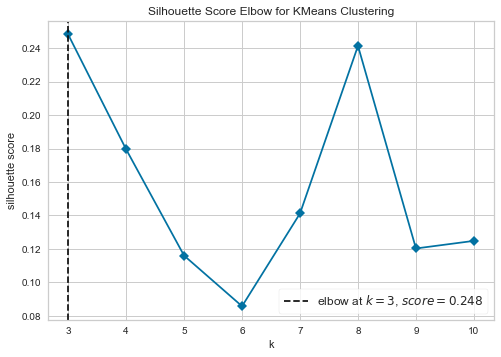

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [64]:
#! pip install yellowbrick
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# set number of clusters
# kclusters = 6
kkclusters = (3,11)

torontos_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
# kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(downtown_grouped_clustering)
model = KMeans(random_state=0)
# visualizer = KElbowVisualizer(model, k=kclusters, metric='calinski_harabasz', timings=False) # random state=0
visualizer = KElbowVisualizer(model, k=kkclusters, metric='silhouette', timings=False) # random state = 0

visualizer.fit(torontos_grouped_clustering)        # Fit the data to the visualizer
visualizer.show()                                  # Finalize and render the figure

# check cluster labels generated for each row in the dataframe
# kmeans.labels_

In [65]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'ClusterLabel', kmeans.labels_)

toronto_merged = df_geo

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head(100) # check the last columns!

ValueError: cannot insert ClusterLabel, already exists

In [46]:
#Finally, let's visualize the resulting clusters

In [66]:
toronto_merged = toronto_merged.dropna(subset=['ClusterLabel'])

In [67]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(knclusters)
ys = [i + x + (i*x)**2 for i in range(knclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#cluster = kmeans.labels_.astype(int)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['ClusterLabel']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    acluster = int(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[(acluster)-1],
        fill=True,
        fill_color=rainbow[(acluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [49]:
#Examine Clusters

In [50]:
#Now, you can examine each cluster 
#and determine the discriminating venue categories that distinguish each cluster. 
#Based on the defining categories, you can then assign a name to each cluster. 

In [68]:
#Cluster 1
toronto_merged.loc[toronto_merged['ClusterLabel'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,ClusterLabel,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32,Scarborough,0.0,Pizza Place,Playground,Women's Store,Distribution Center,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
50,North York,0.0,Gym,Pizza Place,Home Service,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant
52,North York,0.0,Gym,Dog Run,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant,College Cafeteria
83,Central Toronto,0.0,Gym,Trail,Escape Room,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dance Studio


In [69]:
#cluster 2
toronto_merged.loc[toronto_merged['ClusterLabel'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,ClusterLabel,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North York,1.0,Park,Fast Food Restaurant,Food & Drink Shop,Women's Store,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
10,North York,1.0,Park,Bakery,Italian Restaurant,Japanese Restaurant,Event Space,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run
40,North York,1.0,Park,Bus Stop,Airport,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant
44,Scarborough,1.0,Bakery,Park,Metro Station,Intersection,Bus Line,Ice Cream Shop,Soccer Field,Donut Shop,Doner Restaurant,Dog Run
49,North York,1.0,Park,Basketball Court,Bakery,Construction & Landscaping,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run
61,Central Toronto,1.0,Park,Swim School,Bus Line,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Deli / Bodega
67,Central Toronto,1.0,Hotel,Park,Breakfast Spot,Food & Drink Shop,Department Store,Sandwich Place,Women's Store,Distribution Center,Dim Sum Restaurant,Diner
68,Central Toronto,1.0,Trail,Park,Sushi Restaurant,Bus Line,Jewelry Store,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
77,Etobicoke,1.0,Park,Bus Line,Sandwich Place,Mobile Phone Shop,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run


In [70]:
#cluster 3
toronto_merged.loc[toronto_merged['ClusterLabel'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,ClusterLabel,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,North York,2.0,Hockey Arena,Coffee Shop,Pizza Place,Portuguese Restaurant,Women's Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
2,Downtown Toronto,2.0,Coffee Shop,Bakery,Park,Pub,Breakfast Spot,Café,Theater,Gym / Fitness Center,Event Space,Restaurant
3,North York,2.0,Clothing Store,Accessories Store,Miscellaneous Shop,Vietnamese Restaurant,Coffee Shop,Gift Shop,Boutique,Furniture / Home Store,Women's Store,Distribution Center
4,Queen's Park,2.0,Coffee Shop,Sushi Restaurant,Yoga Studio,Burger Joint,Italian Restaurant,Japanese Restaurant,Smoothie Shop,Beer Bar,Sandwich Place,Salad Place
6,Scarborough,2.0,Fast Food Restaurant,Print Shop,Women's Store,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...
97,Downtown Toronto,2.0,Coffee Shop,Café,Hotel,Restaurant,Gym,Japanese Restaurant,Seafood Restaurant,Salad Place,Steakhouse,Asian Restaurant
99,Downtown Toronto,2.0,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Restaurant,Gay Bar,Smoke Shop,Fast Food Restaurant,Pub,Yoga Studio,Hotel
100,East Toronto Business,2.0,Yoga Studio,Auto Workshop,Park,Comic Shop,Pizza Place,Restaurant,Burrito Place,Brewery,Skate Park,Light Rail Station
101,Etobicoke,2.0,Business Service,Home Service,Baseball Field,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Women's Store


In [71]:
#cluster 4
toronto_merged.loc[toronto_merged['ClusterLabel'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,ClusterLabel,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,York,3.0,Park,Pool,Women's Store,Golf Course,Electronics Store,Dumpling Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run
35,East York/East Toronto,3.0,Convenience Store,Park,Intersection,Women's Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run
64,York,3.0,Convenience Store,Park,Women's Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
66,North York,3.0,Park,Convenience Store,Women's Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
85,Scarborough,3.0,Park,Intersection,Playground,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run
91,Downtown Toronto,3.0,Park,Playground,Trail,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Electronics Store,Donut Shop,Doner Restaurant,Dance Studio
98,Etobicoke,3.0,Park,River,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop,Doner Restaurant,College Cafeteria,Distribution Center


In [72]:
#cluster 5
toronto_merged.loc[toronto_merged['ClusterLabel'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,ClusterLabel,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [73]:
#cluster 6
toronto_merged.loc[toronto_merged['ClusterLabel'] == 5, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,ClusterLabel,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [74]:
column_names = ['Postalcode','Borough','Neighborhood','Venue Category']
fastfood_restaurants = pd.DataFrame(columns = column_names)
italian_restaurants = pd.DataFrame(columns = column_names)
eastasian_restaurants = pd.DataFrame(columns = column_names)
japanese_restaurants = pd.DataFrame(columns = column_names)
fourcategories_restaurants = pd.DataFrame(columns = column_names)
toronto_venues_restaurant = pd.DataFrame(columns = column_names)
toronto_venues_only_restaurant = pd.DataFrame(columns = column_names)
fastfood_restaurants
italian_restaurants
eastasian_restaurants
japanese_restaurants
fourcategories_restaurants
toronto_venues_restaurant
toronto_venues_only_restaurant

,Postalcode,Borough,Neighborhood,Venue Category


In [75]:
# Create a Data-Frame out of it to concentrate only on Restaurants 
toronto_venues_only_restaurant = toronto_venues[toronto_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
toronto_venues_only_restaurant.index = np.arange(1, len(toronto_venues_only_restaurant )+1)

In [76]:
print (toronto_venues_only_restaurant['Venue Category'].value_counts())

Restaurant                         65
Italian Restaurant                 48
Japanese Restaurant                39
Fast Food Restaurant               32
Sushi Restaurant                   29
Seafood Restaurant                 24
Thai Restaurant                    22
American Restaurant                18
Vegetarian / Vegan Restaurant      16
Middle Eastern Restaurant          14
Asian Restaurant                   14
Indian Restaurant                  14
Greek Restaurant                   14
Chinese Restaurant                 13
Mexican Restaurant                 13
Vietnamese Restaurant              11
French Restaurant                  10
Caribbean Restaurant                8
Comfort Food Restaurant             8
New American Restaurant             7
Ramen Restaurant                    6
Mediterranean Restaurant            6
Gluten-free Restaurant              4
Latin American Restaurant           4
Korean Restaurant                   4
Eastern European Restaurant         3
Modern Europ

In [77]:
print('There are {} unique categories.'.format(len(toronto_venues_only_restaurant['Venue Category'].unique())))

There are 49 unique categories.


In [78]:
print('There are {} unique postal codes.'.format(len(toronto_venues_only_restaurant['Postal Code'].unique())))

There are 65 unique postal codes.


In [79]:
toronto_venues_only_restaurant

,Postal Code,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,M3A,Parkwoods,43.753259,-79.329656,KFC,43.754387,-79.333021,Fast Food Restaurant
2,M4A,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
3,M5A,"Regent Park, Harbourfront",43.654260,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
4,M5A,"Regent Park, Harbourfront",43.654260,-79.360636,El Catrin,43.650601,-79.358920,Mexican Restaurant
5,M5A,"Regent Park, Harbourfront",43.654260,-79.360636,Izumi,43.649970,-79.360153,Asian Restaurant
...,...,...,...,...,...,...,...,...
477,M4Y,Church and Wellesley,43.665860,-79.383160,A&W,43.666415,-79.378235,Fast Food Restaurant
478,M4Y,Church and Wellesley,43.665860,-79.383160,McDonald's,43.668854,-79.385962,Fast Food Restaurant
479,M7Y,Enclave of M4L,43.662744,-79.321558,Chick-n-Joy,43.665181,-79.321403,Fast Food Restaurant
480,M7Y,Enclave of M4L,43.662744,-79.321558,The Green Wood,43.664728,-79.324117,Restaurant


In [80]:
# create a dataframe of top 20 categories
toronto_venues_top20 = toronto_venues_only_restaurant['Venue Category'].value_counts()[0:20].to_frame(name='frequency')
toronto_venues_top20 = toronto_venues_top20.reset_index()
toronto_venues_top20.rename(index=str, columns={ "index": "Venue_Category","frequency": "Frequency"}, inplace=True)
toronto_venues_top20

,Venue_Category,Frequency
0,Restaurant,65
1,Italian Restaurant,48
2,Japanese Restaurant,39
3,Fast Food Restaurant,32
4,Sushi Restaurant,29
5,Seafood Restaurant,24
6,Thai Restaurant,22
7,American Restaurant,18
8,Vegetarian / Vegan Restaurant,16
9,Middle Eastern Restaurant,14


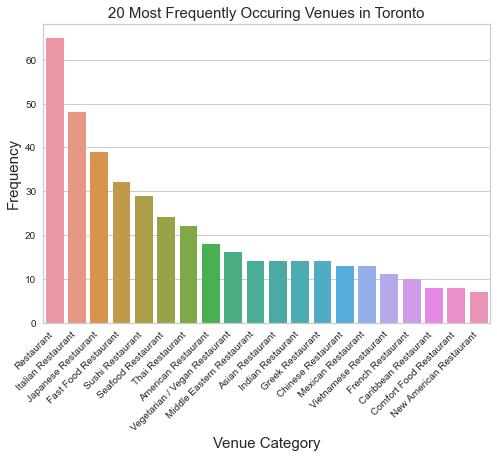

<Figure size 2880x1080 with 0 Axes>

In [81]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=toronto_venues_top20)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('20 Most Frequently Occuring Venues in Toronto', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(40,15))
plt.show()

In [82]:
# one hot encoding
tor_restaurant_onehot = pd.get_dummies(toronto_venues_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
tor_restaurant_onehot['Neighborhood'] = toronto_venues_only_restaurant['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [tor_restaurant_onehot.columns[-1]] + list(tor_restaurant_onehot.columns[:-1])
tor_restaurant_onehot = tor_restaurant_onehot[fixed_columns]

tor_restaurant_onehot.head(103)

,Neighborhood,Afghan Restaurant,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,...,Ramen Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,"Regent Park, Harbourfront",0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,Central Bay Street,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
100,Central Bay Street,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101,Central Bay Street,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,Central Bay Street,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
#group rows by neighborhood and by taking the 
#mean of the frequency of occurrence of each category

tor_restaurant_grouped = tor_restaurant_onehot.groupby('Neighborhood').mean().reset_index()

In [87]:
tor_restaurant_onehot

,Neighborhood,Afghan Restaurant,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,...,Ramen Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,"Regent Park, Harbourfront",0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,Church and Wellesley,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
478,Church and Wellesley,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
479,Enclave of M4L,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
480,Enclave of M4L,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [88]:
#print each neighborhood along with the top 5 most common venues
num_top_rest_venues = 5

for hood in tor_restaurant_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = tor_restaurant_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_rest_venues))
    print('\n')

----Agincourt----
                       venue  freq
0  Latin American Restaurant   1.0
1          Afghan Restaurant   0.0
2         Italian Restaurant   0.0
3      Korean BBQ Restaurant   0.0
4          Korean Restaurant   0.0


----Bathurst Manor, Wilson Heights, Downsview North----
                   venue  freq
0    Japanese Restaurant   0.5
1     Chinese Restaurant   0.5
2     Persian Restaurant   0.0
3  Korean BBQ Restaurant   0.0
4      Korean Restaurant   0.0


----Bayview Village----
                 venue  freq
0   Italian Restaurant  0.18
1           Restaurant  0.18
2    Indian Restaurant  0.09
3  American Restaurant  0.09
4      Thai Restaurant  0.09


----Bedford Park, Lawrence Manor East----
                venue  freq
0  Seafood Restaurant  0.17
1          Restaurant  0.17
2   Indian Restaurant  0.08
3    Greek Restaurant  0.08
4   French Restaurant  0.08


----Berczy Park----
                     venue  freq
0               Restaurant   0.5
1       Italian Restaurant  

<ipython-input-88-2a4007b01f50>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp = tor_restaurant_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
<ipython-input-88-2a4007b01f50>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp = tor_restaurant_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
<ipython-input-88-2a4007b01f50>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp = tor_restaurant_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
<ipython-input-88-2a4007b01f50>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp = tor_restaurant_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
<ipython-input-88-2a4007b01f50>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp = tor_restaurant_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()


ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

In [89]:
# write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [90]:
#create the new dataframe and display the top 10 venues for each neighborhood.

num_top_rest_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
hoods_rest_venues_sorted = pd.DataFrame(columns=columns)
hoods_rest_venues_sorted['Neighborhood'] = tor_restaurant_grouped['Neighborhood']

for ind in np.arange(tor_restaurant_grouped.shape[0]):
    hoods_rest_venues_sorted.iloc[ind, 1:] = return_most_common_venues(tor_restaurant_grouped.iloc[ind, :], num_top_venues)

hoods_rest_venues_sorted.head(103)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Latin American Restaurant,Vietnamese Restaurant,Doner Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
1,"Bathurst Manor, Wilson Heights, Downsview North",Sushi Restaurant,Restaurant,Middle Eastern Restaurant,Vietnamese Restaurant,Dim Sum Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
2,Bayview Village,Japanese Restaurant,Chinese Restaurant,Vietnamese Restaurant,Doner Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
3,"Bedford Park, Lawrence Manor East",Italian Restaurant,Restaurant,Indian Restaurant,Sushi Restaurant,Fast Food Restaurant,Comfort Food Restaurant,Greek Restaurant,Thai Restaurant,American Restaurant,Dumpling Restaurant
4,Berczy Park,Seafood Restaurant,Restaurant,Indian Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Eastern European Restaurant,Comfort Food Restaurant,Greek Restaurant,Thai Restaurant
...,...,...,...,...,...,...,...,...,...,...,...
60,Victoria Village,Portuguese Restaurant,Vietnamese Restaurant,Dim Sum Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
61,Westmount,Chinese Restaurant,Middle Eastern Restaurant,Vietnamese Restaurant,Doner Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
62,"Wexford, Maryvale",Vietnamese Restaurant,Middle Eastern Restaurant,Doner Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
63,Willowdale South,Ramen Restaurant,Sushi Restaurant,Vietnamese Restaurant,Fast Food Restaurant,Japanese Restaurant,Restaurant,Korean Restaurant,Middle Eastern Restaurant,Dim Sum Restaurant,Filipino Restaurant


In [91]:
#Run k-means to cluster the neighborhood into  clusters.
# set number of clusters
kclusters = 6

tor_rest_grouped_clustering = tor_restaurant_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, init='k-means++', max_iter=15, random_state=0).fit(tor_rest_grouped_clustering)

X = tor_rest_grouped_clustering

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [92]:
def get_inertia(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=15, random_state=8)
    km.fit(X)
    return km.inertia_

In [93]:
scores = [get_inertia(x) for x in range(2, 21)]

Text(0, 0.5, 'Error')

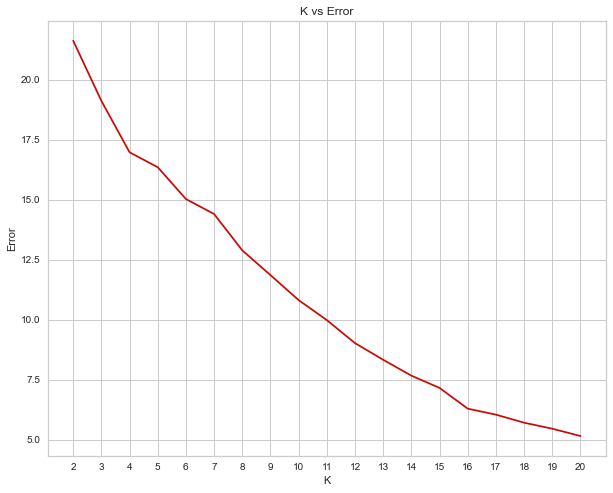

In [73]:
plt.figure(figsize=[10, 8])
sns.lineplot(x=range(2, 21), y=scores, color='r')
plt.title("K vs Error")
plt.xticks(range(2, 21))
plt.xlabel("K")
plt.ylabel("Error")

In [74]:
#k = 4

In [94]:
#tor_rest_grouped_clustering
#tor_restaurant_onehot
# add clustering labels
hoods_rest_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)

toronto_merged = df_geo

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(hoods_rest_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

#remove rows with NaN values
toronto_merged = toronto_merged.dropna(subset=['Cluster Label'])
toronto_merged_hood = toronto_merged 
toronto_merged.head(100) # check columns

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,1.0,Fast Food Restaurant,Vietnamese Restaurant,Hakka Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant
1,M4A,North York,Victoria Village,43.725882,-79.315572,0.0,Portuguese Restaurant,Vietnamese Restaurant,Dim Sum Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0.0,Asian Restaurant,French Restaurant,Restaurant,Mexican Restaurant,Vietnamese Restaurant,Doner Restaurant,German Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,0.0,Vietnamese Restaurant,Hakka Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494,0.0,Sushi Restaurant,Italian Restaurant,Japanese Restaurant,Restaurant,Persian Restaurant,Mexican Restaurant,Vietnamese Restaurant,Dim Sum Restaurant,Filipino Restaurant,Fast Food Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,M4X,Downtown Toronto,"St. James Town, Cabbagetown",43.667967,-79.367675,0.0,Italian Restaurant,Restaurant,Chinese Restaurant,Indian Restaurant,Thai Restaurant,Taiwanese Restaurant,Japanese Restaurant,Caribbean Restaurant,Doner Restaurant,French Restaurant
97,M5X,Downtown Toronto,"First Canadian Place, Underground city",43.648429,-79.382280,0.0,Restaurant,Japanese Restaurant,Asian Restaurant,Seafood Restaurant,American Restaurant,Thai Restaurant,Sushi Restaurant,Italian Restaurant,Fast Food Restaurant,Colombian Restaurant
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,0.0,Sushi Restaurant,Japanese Restaurant,Restaurant,Fast Food Restaurant,Mediterranean Restaurant,Indian Restaurant,Mexican Restaurant,American Restaurant,Caribbean Restaurant,Ethiopian Restaurant
100,M7Y,East Toronto Business,Enclave of M4L,43.662744,-79.321558,0.0,Fast Food Restaurant,Restaurant,Vietnamese Restaurant,Dim Sum Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant,Ethiopian Restaurant


In [76]:
#toronto_merged_hood

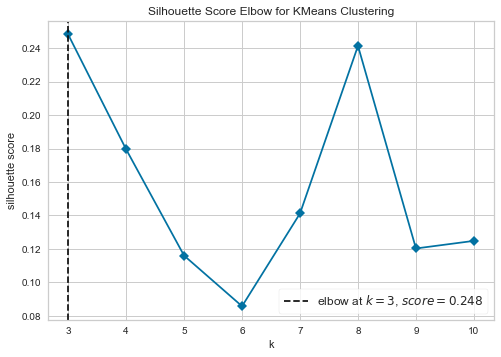

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [95]:
#! pip install yellowbrick
#from sklearn.cluster import KMeans
#from yellowbrick.cluster import KElbowVisualizer

# set number of clusters
# kclusters = 6
kyclusters = (3,11)

tor_rest_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
# kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(downtown_grouped_clustering)
model = KMeans(random_state=0)
# visualizer = KElbowVisualizer(model, k=kclusters, metric='calinski_harabasz', timings=False) # random state=0
visualizer = KElbowVisualizer(model, k=kyclusters, metric='silhouette', timings=False) # random state = 0

visualizer.fit(tor_rest_grouped_clustering)        # Fit the data to the visualizer
visualizer.show()                                  # Finalize and render the figure

# check cluster labels generated for each row in the dataframe
# kmeans.labels_

In [96]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(knclusters)
ys = [i + x + (i*x)**2 for i in range(knclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#cluster = kmeans.labels_.astype(int)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    acluster = int(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[(acluster)-1],
        fill=True,
        fill_color=rainbow[(acluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [97]:
tor_restaurant_onehot

,Neighborhood,Afghan Restaurant,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,...,Ramen Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,"Regent Park, Harbourfront",0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,Church and Wellesley,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
478,Church and Wellesley,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
479,Enclave of M4L,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
480,Enclave of M4L,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
#toronto_merged_hood

In [ ]:
#Cluster 1
#toronto_merged.loc[toronto_merged['Cluster Label'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

In [99]:
#cluster #1
toronto_merged_hood.loc[toronto_merged_hood['Cluster Label'] == 0.0 ]

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,M4A,North York,Victoria Village,43.725882,-79.315572,0.0,Portuguese Restaurant,Vietnamese Restaurant,Dim Sum Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0.0,Asian Restaurant,French Restaurant,Restaurant,Mexican Restaurant,Vietnamese Restaurant,Doner Restaurant,German Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,0.0,Vietnamese Restaurant,Hakka Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494,0.0,Sushi Restaurant,Italian Restaurant,Japanese Restaurant,Restaurant,Persian Restaurant,Mexican Restaurant,Vietnamese Restaurant,Dim Sum Restaurant,Filipino Restaurant,Fast Food Restaurant
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0.0,Middle Eastern Restaurant,Japanese Restaurant,Italian Restaurant,Ramen Restaurant,Fast Food Restaurant,Restaurant,Modern European Restaurant,Chinese Restaurant,Vietnamese Restaurant,Seafood Restaurant
10,M6B,North York,Glencairn,43.709577,-79.445073,0.0,Italian Restaurant,Japanese Restaurant,Vietnamese Restaurant,Doner Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
13,M3C,North York,Don Mills South,43.725900,-79.340923,0.0,Restaurant,Asian Restaurant,Italian Restaurant,Sushi Restaurant,Chinese Restaurant,Dim Sum Restaurant,Vietnamese Restaurant,Dumpling Restaurant,German Restaurant,French Restaurant
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0.0,Restaurant,Italian Restaurant,Seafood Restaurant,Moroccan Restaurant,Comfort Food Restaurant,New American Restaurant,German Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Middle Eastern Restaurant
18,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0.0,Restaurant,Mexican Restaurant,Vietnamese Restaurant,Dim Sum Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
19,M4E,East Toronto,The Beaches,43.676357,-79.293031,0.0,Asian Restaurant,Vietnamese Restaurant,Doner Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant


In [100]:
#cluster #2
toronto_merged_hood.loc[toronto_merged_hood['Cluster Label'] == 1.0 ]

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,1.0,Fast Food Restaurant,Vietnamese Restaurant,Hakka Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,1.0,Fast Food Restaurant,Vietnamese Restaurant,Hakka Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant
27,M2H,North York,Hillcrest Village,43.803762,-79.363452,1.0,Fast Food Restaurant,Mediterranean Restaurant,Vietnamese Restaurant,Doner Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant,Ethiopian Restaurant
89,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437,1.0,Fast Food Restaurant,Vietnamese Restaurant,Hakka Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant
90,M1W,Scarborough,"Steeles West, L'Amoreaux West",43.799525,-79.318389,1.0,Fast Food Restaurant,Chinese Restaurant,Vietnamese Restaurant,Doner Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant,Ethiopian Restaurant
102,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,1.0,Fast Food Restaurant,Vietnamese Restaurant,Hakka Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant


In [101]:
#cluster #3
toronto_merged_hood.loc[toronto_merged_hood['Cluster Label'] == 2.0 ]

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,M3B,North York,Don Mills North,43.745906,-79.352188,2.0,Japanese Restaurant,Caribbean Restaurant,Vietnamese Restaurant,Doner Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
34,M3J,North York,"Northwood Park, York University",43.767980,-79.487262,2.0,Caribbean Restaurant,Vietnamese Restaurant,Doner Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
63,M6N,York,"Runnymede, The Junction North",43.673185,-79.487262,2.0,Caribbean Restaurant,Vietnamese Restaurant,Doner Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant


In [102]:
#cluster #4
toronto_merged_hood.loc[toronto_merged_hood['Cluster Label'] == 3.0 ]

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,M1G,Scarborough,Woburn,43.770992,-79.216917,3.0,Korean BBQ Restaurant,Vietnamese Restaurant,Doner Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant


In [103]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped = toronto_grouped[['Neighborhood', 'Asian Restaurant','Thai Restaurant','Chinese Restaurant']]
toronto_grouped.set_index('Cluster Label', inplace=True)

KeyError: "None of ['Cluster Label'] are in the columns"

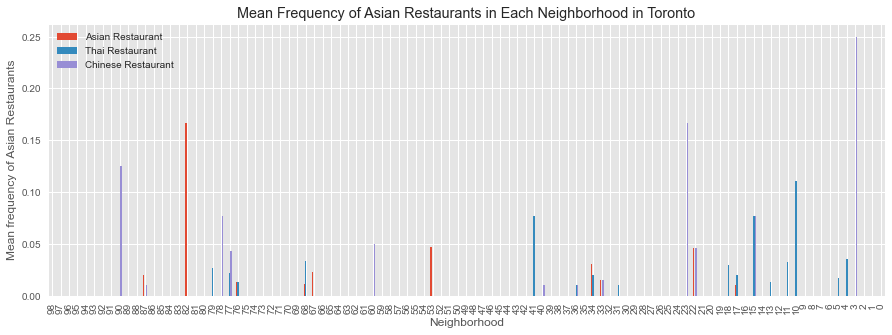

In [104]:
# sort by descending order
toronto_grouped.sort_values(by='Neighborhood', ascending=False, inplace=True)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')
toronto_grouped.plot(kind='bar', figsize=(15,5))

plt.title('Mean Frequency of Asian Restaurants in Each Neighborhood in Toronto')
plt.xlabel('Neighborhood')
plt.ylabel('Mean frequency of Asian Restaurants')

plt.show()

In [105]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped = toronto_grouped[['Neighborhood', 'Italian Restaurant','Mediterranean Restaurant','French Restaurant']]
toronto_grouped.set_index('Neighborhood', inplace=True)

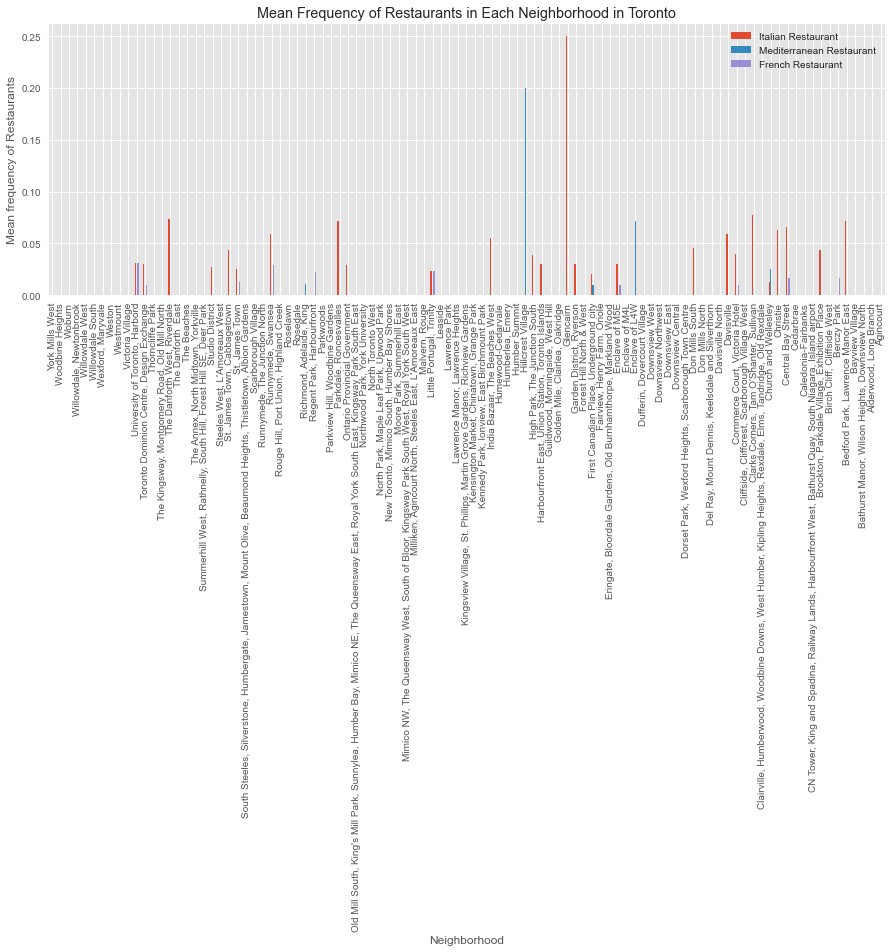

In [106]:
# sort by descending order
toronto_grouped.sort_values(by='Neighborhood', ascending=False, inplace=True)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')
toronto_grouped.plot(kind='bar', figsize=(15,5))

plt.title('Mean Frequency of Restaurants in Each Neighborhood in Toronto')
plt.xlabel('Neighborhood')
plt.ylabel('Mean frequency of Restaurants')

plt.show()

In [107]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped = toronto_grouped[['Neighborhood', 'Italian Restaurant','Asian Restaurant']]
toronto_grouped.set_index('Neighborhood', inplace=True)

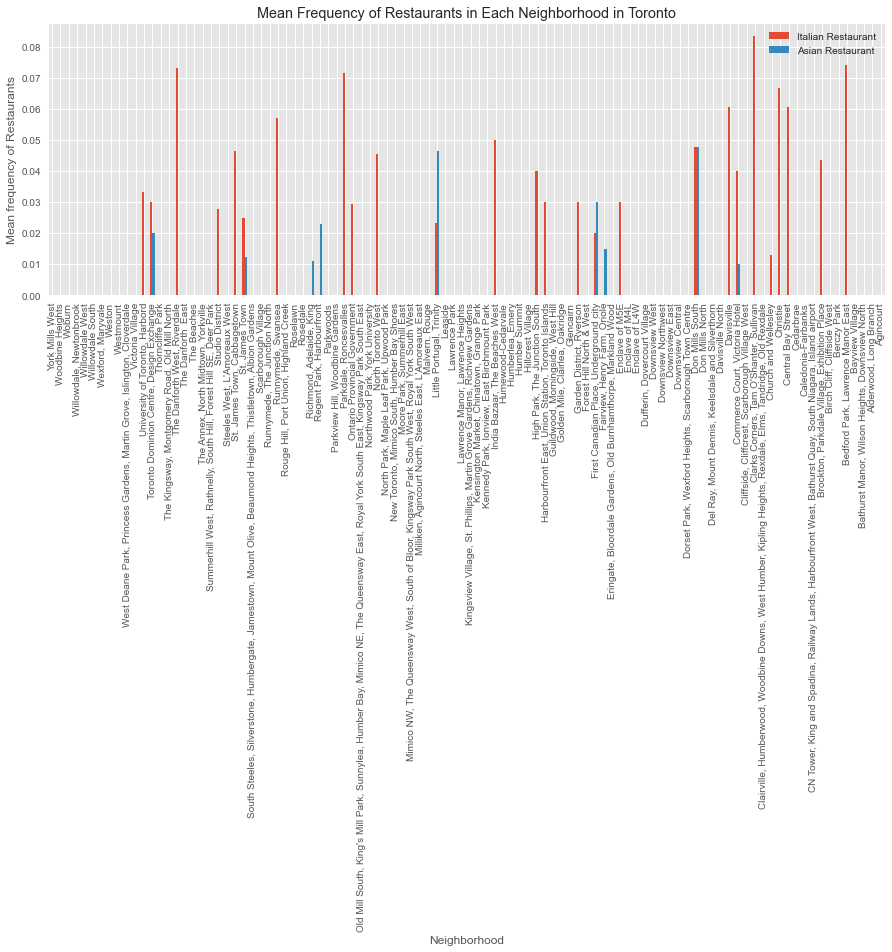

In [91]:
# sort by descending order
toronto_grouped.sort_values(by='Neighborhood', ascending=False, inplace=True)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')
toronto_grouped.plot(kind='bar', figsize=(15,5))

plt.title('Mean Frequency of Restaurants in Each Neighborhood in Toronto')
plt.xlabel('Neighborhood')
plt.ylabel('Mean frequency of Restaurants')

plt.show()